In [ ]:
# !pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import numpy as np

# import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import geopy.distance
from sklearn.cluster import KMeans

from tqdm import tqdm
import pickle

In [2]:
!gdown --fuzzy https://drive.google.com/file/d/1dcxlzxoGZCEUwEY6lsj5GN0iAvTvGAaG/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1dcxlzxoGZCEUwEY6lsj5GN0iAvTvGAaG
To: /content/date_and_null_managed.csv
100% 496M/496M [00:03<00:00, 149MB/s]


In [3]:
## saved model
!gdown --fuzzy https://drive.google.com/file/d/1Qqw-aabiH1rhlc5QDaPn8bDOuf3fVsEP/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1Qqw-aabiH1rhlc5QDaPn8bDOuf3fVsEP
To: /content/kmeans_1k.pkl
100% 2.62M/2.62M [00:00<00:00, 200MB/s]


In [28]:
# df.engage_time.value_counts()

In [27]:
df = pd.read_csv('date_and_null_managed.csv')  #13L
df.columns

Index(['_id', 'view_id', 'student_id', 'question_id', 'answer_id',
       'answer_video', 'video_time', 'engage_time', 'created_at', 'updated_at',
       'parent_id', 'session_id', 'tab_id', 'is_back', 'ip_address', 'source',
       'refer_id', 'view_from', 'referred_st_id', 'package', 'cityData',
       'chapterData', 'latitude', 'longitude', 'pincode', 'state', 'country',
       'tehsil'],
      dtype='object')

In [5]:
## remove null/0 values for lat long, select only aug values

# df = df.drop(df[df.longitude==0.0].index)
# print(len(df))      # 1301729
# df = df.loc[(df.longitude<=98) & (df.longitude>=60)]
# df2 = df.loc[(df.latitude<=38) & (df.latitude>=8)]
# print(len(df))      # 1301318

# df2 = df2[df2.created_at.apply(lambda x:x[4:7])=="Aug"]  

In [29]:
poi_cols = [ "latitude","longitude", "state", "cityData", "chapterData", "engage_time"]

In [30]:
df2 = df.groupby(['student_id','question_id']).first()[poi_cols].reset_index()  # 6.5L
df2

,student_id,question_id,latitude,longitude,state,cityData,chapterData,engage_time
0,445,1390488,28.468468,77.066684,Haryana,Gurugram,LIMITS AND DERIVATIVES,0.068
1,445,22545507,28.468468,77.066684,Haryana,Gurugram,AVERAGE,0.007
2,445,95017630,28.468468,77.066684,Haryana,Gurugram,GRAVITATION,0.001
3,445,121337623,28.468468,77.066684,Haryana,Gurugram,MOTION,0.008
4,445,125472920,28.468468,77.066684,Haryana,Gurugram,GRAVITATION,0.003
...,...,...,...,...,...,...,...,...
650795,249189720,26770102,24.198198,80.792706,Madhya Pradesh,Sagmaniha,MATTER IN OUR SURROUNDING,0.002
650796,249189720,26770263,24.198198,80.792706,Madhya Pradesh,Sagmaniha,DIVERSITY IN LIVING ORGANISM,0.013
650797,249189720,52304401,24.198198,80.792706,Madhya Pradesh,Sagmaniha,REPRODUCTION IN ORGANISMS,0.056
650798,249189720,54862169,24.198198,80.792706,Madhya Pradesh,Sagmaniha,ELECTROSTATICS,0.024


In [31]:
## check null values in all columns
df2.isna().sum(axis=0)

student_id          0
question_id         0
latitude            0
longitude           0
state          112728
cityData            0
chapterData         0
engage_time         0
dtype: int64

In [32]:
# df2.to_csv("user_question_indexed.csv", index=None)

In [33]:
n = 1000
coords = df2[['longitude','latitude']]

# kmeansModel = KMeans(n_clusters=n)
# labels = kmeansModel.fit_predict(coords)

with open(r"kmeans_1k.pkl", "rb") as input_file:
    kmeansModel = pickle.load(input_file)
labels = kmeansModel.predict(coords)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator KMeans from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [34]:
# with open(r"kmeans_1k.pkl", "wb") as output_file:
#     pickle.dump(kmeansModel, output_file)

In [35]:
df2['kmeans_cluster'] = labels
df2

,student_id,question_id,latitude,longitude,state,cityData,chapterData,engage_time,kmeans_cluster
0,445,1390488,28.468468,77.066684,Haryana,Gurugram,LIMITS AND DERIVATIVES,0.068,55
1,445,22545507,28.468468,77.066684,Haryana,Gurugram,AVERAGE,0.007,55
2,445,95017630,28.468468,77.066684,Haryana,Gurugram,GRAVITATION,0.001,55
3,445,121337623,28.468468,77.066684,Haryana,Gurugram,MOTION,0.008,55
4,445,125472920,28.468468,77.066684,Haryana,Gurugram,GRAVITATION,0.003,55
...,...,...,...,...,...,...,...,...,...
650795,249189720,26770102,24.198198,80.792706,Madhya Pradesh,Sagmaniha,MATTER IN OUR SURROUNDING,0.002,910
650796,249189720,26770263,24.198198,80.792706,Madhya Pradesh,Sagmaniha,DIVERSITY IN LIVING ORGANISM,0.013,910
650797,249189720,52304401,24.198198,80.792706,Madhya Pradesh,Sagmaniha,REPRODUCTION IN ORGANISMS,0.056,910
650798,249189720,54862169,24.198198,80.792706,Madhya Pradesh,Sagmaniha,ELECTROSTATICS,0.024,910


### city wise data

In [36]:
city_wise_users = df2['cityData'].value_counts()
print(f"len of total city dataset = {len(city_wise_users)}")
city_wise_users = city_wise_users[city_wise_users>30]
print(f"len of filtered city dataset = {len(city_wise_users)}")
# city_wise_users.to_csv("city_data.csv")

len of total city dataset = 34868
len of filtered city dataset = 3524


In [37]:
## city vs total user-question instances

# !gdown --fuzzy "https://drive.google.com/file/d/1-gvfjGKwV848Cbww6IKLpN2IOp7YdC_h/view?usp=sharing"
# processed_city_data = pd.read_csv("processed_city_data.csv",header=0, names=['city', 'population'])
# processed_city_data.city = processed_city_data.city.apply(lambda x:x.capitalize())
# processed_city_data = processed_city_data.groupby('city').sum().sort_values('population', ascending=False).reset_index()
# processed_city_data.to_csv("processed_city_data.csv", index=None)

## cluster specific analysis

In [38]:
df2

,student_id,question_id,latitude,longitude,state,cityData,chapterData,engage_time,kmeans_cluster
0,445,1390488,28.468468,77.066684,Haryana,Gurugram,LIMITS AND DERIVATIVES,0.068,55
1,445,22545507,28.468468,77.066684,Haryana,Gurugram,AVERAGE,0.007,55
2,445,95017630,28.468468,77.066684,Haryana,Gurugram,GRAVITATION,0.001,55
3,445,121337623,28.468468,77.066684,Haryana,Gurugram,MOTION,0.008,55
4,445,125472920,28.468468,77.066684,Haryana,Gurugram,GRAVITATION,0.003,55
...,...,...,...,...,...,...,...,...,...
650795,249189720,26770102,24.198198,80.792706,Madhya Pradesh,Sagmaniha,MATTER IN OUR SURROUNDING,0.002,910
650796,249189720,26770263,24.198198,80.792706,Madhya Pradesh,Sagmaniha,DIVERSITY IN LIVING ORGANISM,0.013,910
650797,249189720,52304401,24.198198,80.792706,Madhya Pradesh,Sagmaniha,REPRODUCTION IN ORGANISMS,0.056,910
650798,249189720,54862169,24.198198,80.792706,Madhya Pradesh,Sagmaniha,ELECTROSTATICS,0.024,910


In [39]:
df2.set_index("kmeans_cluster", drop=True).sort_index()

,student_id,question_id,latitude,longitude,state,cityData,chapterData,engage_time
kmeans_cluster,,,,,,,,
0,13481066,460908365,25.279279,87.256878,Bihar,Masudanpur Milik,SEQUENCES AND SERIES,0.055
0,8347074,13157263,25.045045,87.328122,Jharkhand,Balachini,CAPACITOR,0.001
0,8347074,13157310,25.045045,87.328122,Jharkhand,Balachini,ELECTROSTATICS,0.003
0,8347074,13157311,25.045045,87.328122,Jharkhand,Balachini,ELECTROSTATICS,0.004
0,8347074,31094088,25.045045,87.328122,Jharkhand,Balachini,ELECTROSTATICS,0.025
...,...,...,...,...,...,...,...,...
999,168576185,14938546,18.108108,73.495983,Maharashtra,Khaire Tarf Birwadi,ELECTROCHEMISTRY,0.001
999,168576185,15159794,18.108108,73.495983,Maharashtra,Khaire Tarf Birwadi,ELECTROSTATICS,0.019
999,168576185,15196232,18.108108,73.495983,Maharashtra,Khaire Tarf Birwadi,CURRENT ELECTRICITY,0.022


In [40]:
# num_clusters = len(set(labels))
# kmeans_clusters = pd.Series([coords[labels == n] for n in range(num_clusters)])

In [ ]:
# kmeans_cluster_centres = kmeansModel.cluster_centers_
# kmeans_cluster_centres

In [ ]:
# from itertools import count
# df2[df2.kmeans_cluster==0].student_id.value_counts()

In [ ]:
# df2.groupby("kmeans_cluster").agg({"student_id": pd.Series.nunique})

In [17]:
# print( geopy.distance.geodesic(, ).km)

def get_radius_of_clusters(kmeans_cluster_centres, df2):
  radius_of_cluster = []
  for i, k in enumerate(range(1000)):
    uniq_users = df2[df2.kmeans_cluster == k].groupby('student_id').first().loc[:, ['longitude', "latitude" ]]
    center = kmeans_cluster_centres[k]
    distances = []
    for lon, lat in uniq_users.values:
      distances.append(geopy.distance.geodesic((center[1],center[0]), (lat, lon)).km)
    radius_of_cluster.append(np.mean(sorted(distances, reverse=True)[:5]))
  return np.round_(radius_of_cluster, 2)

In [18]:
radius_of_cluster = get_radius_of_clusters(kmeansModel.cluster_centers_, df2)

In [19]:
def top_chapters(self):
    n = 5
    return self.value_counts().head(n).to_dict()

def top_city(self):
    self = self.mode()
    self = self.apply(lambda x: x[0] if type(x)!=str else x )
    return self


In [46]:
def top_et_chapters(self):
  n = 5
  print(self)
  return self.head(n).to_dict()


In [69]:
df2.groupby(["kmeans_cluster", "chapterData"])

student_id  question_id  \
kmeans_cluster chapterData                                                    
0              12 APRIL 2019 - SHIFT 2                 8347074    642608053   
               A LETTER TO GOD                        93853170    151816570   
               A TRIUMPH OF SURGERY                   86680205     75908915   
               ACIDS,  BASES AND SALTS               724967084    981330278   
               ALGEBRA                                71699919    283256185   
...                                                        ...          ...   
999            THREE DIMENSIONAL GEOMETRY            148349668        26504   
               TRIANGLES                             168576185    147177377   
               TRIGONOMETRIC FUNCTIONS               168576185    498779142   
               TRIGONOMETRIC RATIOS AND IDENTITIES   148349668        51909   
               VECTOR ALGEBRA                        148349668    430652575   

                                                      latitude   longitude  \
kmeans_cluster chapterData                                                   
0              12 APRIL 2019 - SHIFT 2               25.045045   87.328122   
               A LETTER TO GOD                       50.198198  174.773482   
               A TRIUMPH OF SURGERY                  25.009009   87.302482   
               ACIDS,  BASES AND SALTS              176.173577  611.199468   
               ALGEBRA                               25.297297   87.389418   
...                                                        ...         ...   
999            THREE DIMENSIONAL GEOMETRY            18.108108   73.477026   
               TRIANGLES                             18.108108   73.495983   
               TRIGONOMETRIC FUNCTIONS               18.108108   73.495983   
               TRIGONOMETRIC RATIOS AND IDENTITIES   18.108108   73.477026   
               VECTOR ALGEBRA                        18.108108   73.477026   

                                                    engage_time  
kmeans_cluster chapterData                                       
0              12 APRIL 2019 - SHIFT 2                    0.011  
               A LETTER TO GOD                            0.054  
               A TRIUMPH OF SURGERY                       0.026  
               ACIDS,  BASES AND SALTS                    0.058  
               ALGEBRA                                    0.139  
...                                                         ...  
999            THREE DIMENSIONAL GEOMETRY                 0.034  
               TRIANGLES                                  0.012  
               TRIGONOMETRIC FUNCTIONS                    0.004  
               TRIGONOMETRIC RATIOS AND IDENTITIES        0.149  
               VECTOR ALGEBRA                             0.006  

[102041 rows x 5 columns]

In [122]:
def func(self):
  # print(self)
  # print(, "\n\n")
  return self.groupby(["chapterData"]).sum(numeric_only=True)["engage_time"].sort_values(ascending=False).to_dict()

In [123]:
df2.groupby(["kmeans_cluster", "chapterData"]).first()

student_id  question_id  \
kmeans_cluster chapterData                                                    
0              12 APRIL 2019 - SHIFT 2                 8347074    642608053   
               A LETTER TO GOD                         7172965     75908283   
               A TRIUMPH OF SURGERY                   86680205     75908915   
               ACIDS,  BASES AND SALTS                23712853     56415295   
               ALGEBRA                                71699919    283256185   
...                                                        ...          ...   
999            THREE DIMENSIONAL GEOMETRY            148349668        26504   
               TRIANGLES                             168576185    147177377   
               TRIGONOMETRIC FUNCTIONS               168576185    498779142   
               TRIGONOMETRIC RATIOS AND IDENTITIES   148349668        51909   
               VECTOR ALGEBRA                        148349668    430652575   

                                                     latitude  longitude  \
kmeans_cluster chapterData                                                 
0              12 APRIL 2019 - SHIFT 2              25.045045  87.328122   
               A LETTER TO GOD                      25.189189  87.471000   
               A TRIUMPH OF SURGERY                 25.009009  87.302482   
               ACIDS,  BASES AND SALTS              25.261261  87.243925   
               ALGEBRA                              25.297297  87.389418   
...                                                       ...        ...   
999            THREE DIMENSIONAL GEOMETRY           18.108108  73.477026   
               TRIANGLES                            18.108108  73.495983   
               TRIGONOMETRIC FUNCTIONS              18.108108  73.495983   
               TRIGONOMETRIC RATIOS AND IDENTITIES  18.108108  73.477026   
               VECTOR ALGEBRA                       18.108108  73.477026   

                                                          state  \
kmeans_cluster chapterData                                        
0              12 APRIL 2019 - SHIFT 2                Jharkhand   
               A LETTER TO GOD                        Jharkhand   
               A TRIUMPH OF SURGERY                        None   
               ACIDS,  BASES AND SALTS                    बिहार   
               ALGEBRA                                     None   
...                                                         ...   
999            THREE DIMENSIONAL GEOMETRY           Maharashtra   
               TRIANGLES                            Maharashtra   
               TRIGONOMETRIC FUNCTIONS              Maharashtra   
               TRIGONOMETRIC RATIOS AND IDENTITIES  Maharashtra   
               VECTOR ALGEBRA                       Maharashtra   

                                                               cityData  \
kmeans_cluster chapterData                                                
0              12 APRIL 2019 - SHIFT 2                        Balachini   
               A LETTER TO GOD                                 Bhagaiya   
               A TRIUMPH OF SURGERY                               कर्णु   
               ACIDS,  BASES AND SALTS                          कहलगाँव   
               ALGEBRA                              choudhary basantpur   
...                                                                 ...   
999            THREE DIMENSIONAL GEOMETRY           Kamble Tarf Birwadi   
               TRIANGLES                            Khaire Tarf Birwadi   
               TRIGONOMETRIC FUNCTIONS              Khaire Tarf Birwadi   
               TRIGONOMETRIC RATIOS AND IDENTITIES  Kamble Tarf Birwadi   
               VECTOR ALGEBRA                       Kamble Tarf Birwadi   

                                                    engage_time  
kmeans_cluster chapterData                                       
0              12 APRIL 2019 - SHIFT 2                 

In [124]:
df2.groupby(["kmeans_cluster"]).apply(func)

kmeans_cluster
0      {'ELECTROSTATICS': 2.723, 'LIGHT - REFLECTION ...
1      {'APPLICATION OF DERIVATIVES': 1.834, 'RECTELI...
2      {'CIRCLES': 24.25, 'STRAIGHT LINES': 18.322, '...
3      {'INDEFINITE INTEGRALS': 7.133, 'SOLUTIONS': 6...
4      {'DIFFERENTIATION': 2.556, 'CONTINUITY AND DIF...
                             ...                        
995    {'SOLUTIONS': 2.458, 'INDEFINITE INTEGRALS': 2...
996    {'INDEFINITE INTEGRALS': 0.78, 'SOME BASIC CON...
997    {'DIMENSION AND MEASUREMENT': 3.214, 'ELECTROS...
998    {'STRAIGHT LINES': 6.014, 'BINOMIAL THEOREM': ...
999    {'DIFFERENTIATION': 0.647, 'INVERSE TRIGONOMET...
Length: 1000, dtype: object

In [121]:
df2.groupby(["kmeans_cluster"]).apply(func)

kmeans_cluster
0      {'12 APRIL 2019 - SHIFT 2': 0.011, 'A LETTER T...
1      {' ATOMS AND MOLECULES': 0.306, 'ACIDS,  BASES...
2      {' ATOMS AND MOLECULES': 0.128, '09 APRIL 2019...
3      {'ACIDS,  BASES AND SALTS': 0.0, 'ALCOHOLS, PH...
4      {'A TRIUMPH OF SURGERY': 0.003, 'ALCOHOLS, PHE...
                             ...                        
995    {' ATOMS AND MOLECULES': 0.035, 'ALTERNATING C...
996    {' ATOMS AND MOLECULES': 0.0, 'ALTERNATING CUR...
997    {'ALDEHYDES,KETONES & CARBOXYLIC ACIDS': 0.017...
998    {'ALDEHYDES,KETONES & CARBOXYLIC ACIDS': 0.453...
999    {'APPLICATION OF DERIVATIVES': 0.002, 'CAPACIT...
Length: 1000, dtype: object

In [96]:
df2.groupby(["kmeans_cluster", "chapterData"]).sum(numeric_only=True)["engage_time"]

kmeans_cluster  chapterData                        
0               12 APRIL 2019 - SHIFT 2                0.011
                A LETTER TO GOD                        0.054
                A TRIUMPH OF SURGERY                   0.026
                ACIDS,  BASES AND SALTS                0.058
                ALGEBRA                                0.139
                                                       ...  
999             THREE DIMENSIONAL GEOMETRY             0.034
                TRIANGLES                              0.012
                TRIGONOMETRIC FUNCTIONS                0.004
                TRIGONOMETRIC RATIOS AND IDENTITIES    0.149
                VECTOR ALGEBRA                         0.006
Name: engage_time, Length: 102041, dtype: float64

In [76]:
cluster_based_df = df2.groupby("kmeans_cluster").agg({
    'cityData': top_city, 
    "chapterData": top_chapters, 
    "student_id": pd.Series.nunique
})
cluster_based_df.cityData = cluster_based_df.cityData.apply(lambda x: x[0] if type(x)!=str else x)
cluster_based_df.columns = ["city", "top_chapters", "cluster_population"]

## radius values of clusters
radius_in_kms = pd.Series(radius_of_cluster, name="radius_in_kms")
cluster_based_df = pd.concat((cluster_based_df, radius_in_kms), axis=1)
cluster_based_df.index.name = 'cluster'

In [80]:
cluster_based_df['et'] = df2.groupby(["kmeans_cluster"]).apply(func)

In [81]:
cluster_based_df

,city,top_chapters,cluster_population,radius_in_kms,et
cluster,,,,,
0,Balachini,"{'ELECTROSTATICS': 74, 'LIGHT - REFLECTION AND...",117,25.34,"{'ELECTROSTATICS': 2.723, 'LIGHT - REFLECTION ..."
1,Seekri Chak No. 1,"{'APPLICATION OF DERIVATIVES': 21, 'TRAVELLING...",43,22.99,"{'APPLICATION OF DERIVATIVES': 1.834, 'RECTELI..."
2,Hyderabad,"{'CIRCLES': 238, 'STRAIGHT LINES': 191, 'MOVIN...",281,26.11,"{'CIRCLES': 24.25, 'STRAIGHT LINES': 18.322, '..."
3,Amethi,"{'INVERSE TRIGONOMETRIC FUNCTIONS': 68, 'INDEF...",133,16.48,"{'INDEFINITE INTEGRALS': 7.133, 'SOLUTIONS': 6..."
4,नेपानगर,"{'DIFFERENTIATION': 14, 'INDEFINITE INTEGRALS'...",30,24.80,"{'DIFFERENTIATION': 2.556, 'CONTINUITY AND DIF..."
...,...,...,...,...,...
995,Ahmadgarh,"{'ELECTROSTATICS': 28, 'TRIGONOMETRIC RATIOS A...",61,17.70,"{'SOLUTIONS': 2.458, 'INDEFINITE INTEGRALS': 2..."
996,Vyara,"{'INDEFINITE INTEGRALS': 11, 'HUMAN REPRODUCTI...",9,36.97,"{'INDEFINITE INTEGRALS': 0.78, 'SOME BASIC CON..."
997,Kalpi,"{'LIFE PROCESS': 45, 'PAIR OF LINEAR EQUATION ...",62,21.47,"{'DIMENSION AND MEASUREMENT': 3.214, 'ELECTROS..."


In [ ]:
# cluster_based_df.to_csv("cluster_based_df.csv")

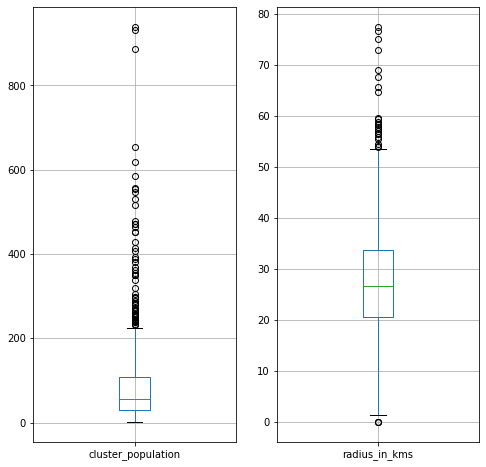

In [ ]:
# cluster_based_df.loc[(cluster_based_df.city =="Patna") | (cluster_based_df.city =="patna")]
plt.figure(figsize=(8,8))
plt.subplot(121)
cluster_based_df.boxplot("cluster_population")
plt.subplot(122)
cluster_based_df.boxplot("radius_in_kms")

In [ ]:
# list of students
kmeans_listOfStudentIds = df2.groupby('kmeans_cluster')['student_id'].apply(list)
kmeans_listOfStudentIds 

kmeans_cluster
0      [1359645, 1561059, 1561059, 1774247, 2586140, ...
1      [5213577, 5213577, 5213577, 5213577, 5213577, ...
2      [359221, 359221, 359221, 359221, 359221, 35922...
3      [861461, 861461, 861461, 861461, 861461, 86146...
4      [4137202, 4137202, 4137202, 6275271, 6275271, ...
                             ...                        
995    [1080117, 1080117, 1080117, 1080117, 1080117, ...
996    [6478253, 6478253, 6478253, 6478253, 6478253, ...
997    [2894733, 2894733, 2894733, 2894733, 2894733, ...
998    [818291, 818291, 818291, 818291, 818291, 81829...
999    [20129710, 20129710, 20129710, 20129710, 20129...
Name: student_id, Length: 1000, dtype: object

## assign clusters to new users


In [ ]:
filtered_indices = cluster_based_df[cluster_based_df.cluster_population>50].index
filtered_centers =  kmeansModel.cluster_centers_[filtered_indices]


In [ ]:
filtered_centers, filtered_indices

In [ ]:
def predict_cluster(lat, lon):
  distances = []
  for center_lon, center_lat in filtered_centers:
    distances.append(geopy.distance.geodesic((center_lat, center_lon), (lat, lon)).km)
  i = np.argmin(distances)
  return filtered_indices[i]

In [ ]:
# lon=77.57
# lat=34.12
# distances = []
# for center_lon, center_lat in filtered_centers:
#   distances.append(geopy.distance.geodesic((center_lat, center_lon), (lat, lon)).km)
# i = np.argmin(distances)

In [ ]:
# kmeansModel.cluster_centers_[filtered_indices[np.argsort(distances)]]

array([[74.80359318, 34.07788953],
       [75.61292   , 32.13716975],
       [74.85440788, 32.70901479],
       ...,
       [77.5221978 , 13.02223408],
       [80.18176788, 13.04226689],
       [77.61464718, 12.88957328]])

In [ ]:
# kmeansModel.cluster_centers_[[905, 45]]

array([[77.5688926 , 34.14414414],
       [74.80359318, 34.07788953]])

In [ ]:
# kmeansModel.predict([[77.57, 34.12]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([905], dtype=int32)

In [ ]:
predict_cluster(lon=77.57, lat=34.12)
cluster_based_df.iloc[45]

city                                                           Srinagar
top_chapters          {'EQUILIBRIUM': 88, 'SOME BASIC CONCEPTS OF CH...
cluster_population                                                   94
radius_in_kms                                                     33.08
Name: 45, dtype: object

## Plot

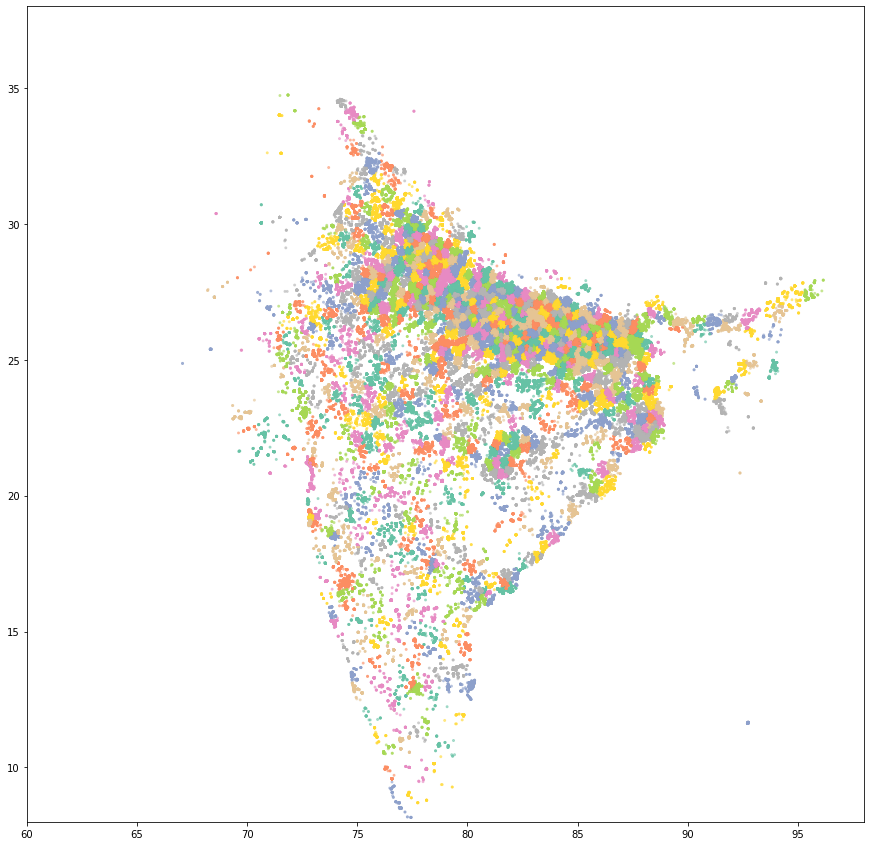

In [ ]:
## plot
n=1000
rgb_values = sns.color_palette("Set2", n)
color_labels = df2['kmeans_cluster'].unique()
color_map = dict(zip(color_labels, rgb_values))

plt.figure(figsize=(15,15))
plt.ylim((8,38))
plt.xlim((60,98))
plt.scatter( df2['longitude'], df2['latitude'], c=df2.kmeans_cluster.map(color_map), s=4 , alpha=0.5)
# plt.savefig('kmeans_1k_clusters.png', bbox_inches='tight')